Ref: https://towardsdatascience.com/creating-beautiful-river-maps-with-python-37c9b5f5b74c

Creating Beautiful River Maps with Python

Crear Bellos Mapas de Ríos con Python

**Preparar los ríos y lagos

In [44]:
import geopandas as gpd

In [45]:
samerica_rios = gpd.read_file("sarivs.shp")

In [46]:
print(samerica_rios)

           cat   a_cat  a_ARCID  a_UP_CELLS   a_AREA  a_WIDTH  a_WIDTH5  \
0            1       1        1         299    62.19    16.38      5.72   
1            2       2        2         135    28.20    11.08      3.93   
2            3       3        3         197    41.26    13.37      4.71   
3            4       4        4         183    38.16    12.87      4.54   
4            5       5        5         130    27.17    10.88      3.86   
...        ...     ...      ...         ...      ...      ...       ...   
465495  465496  459916   459916         271  1212.46    26.88      9.21   
465496  465497  460747   460747        2610   391.41    15.65      5.48   
465497  465498  462741   462741         967   229.88    12.14      4.29   
465498  465499  464090   464090         328   104.52     8.32      2.99   
465499  465500  464215   464215         249    62.29     6.50      2.36   

        a_WIDTH95  a_DEPTH  a_DEPTH5  a_DEPTH95  b_cat  b_value b_label  \
0           47.48     0.

Fusionar con capa de lagos (Natural Earth) del continente

In [5]:
lakes = gpd.read_file("ne_10m_lakes.shp")
country_shapefiles = gpd.read_file("10m_cultural/ne_10m_admin_0_countries.shp")
samerica = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'South America']
samerica_lakes = gpd.sjoin(lakes, samerica, op='intersects')
samerica_lakes = lakes.loc[lakes.index.isin(samerica_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(samerica_rios, samerica_lakes, op='within')
samerica_rios = samerica_rios.loc[~samerica_rios.index.isin(excluded_rivers.index.tolist())]

/home/yoviajo/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3191: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/home/yoviajo/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3191: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Representar los ríos

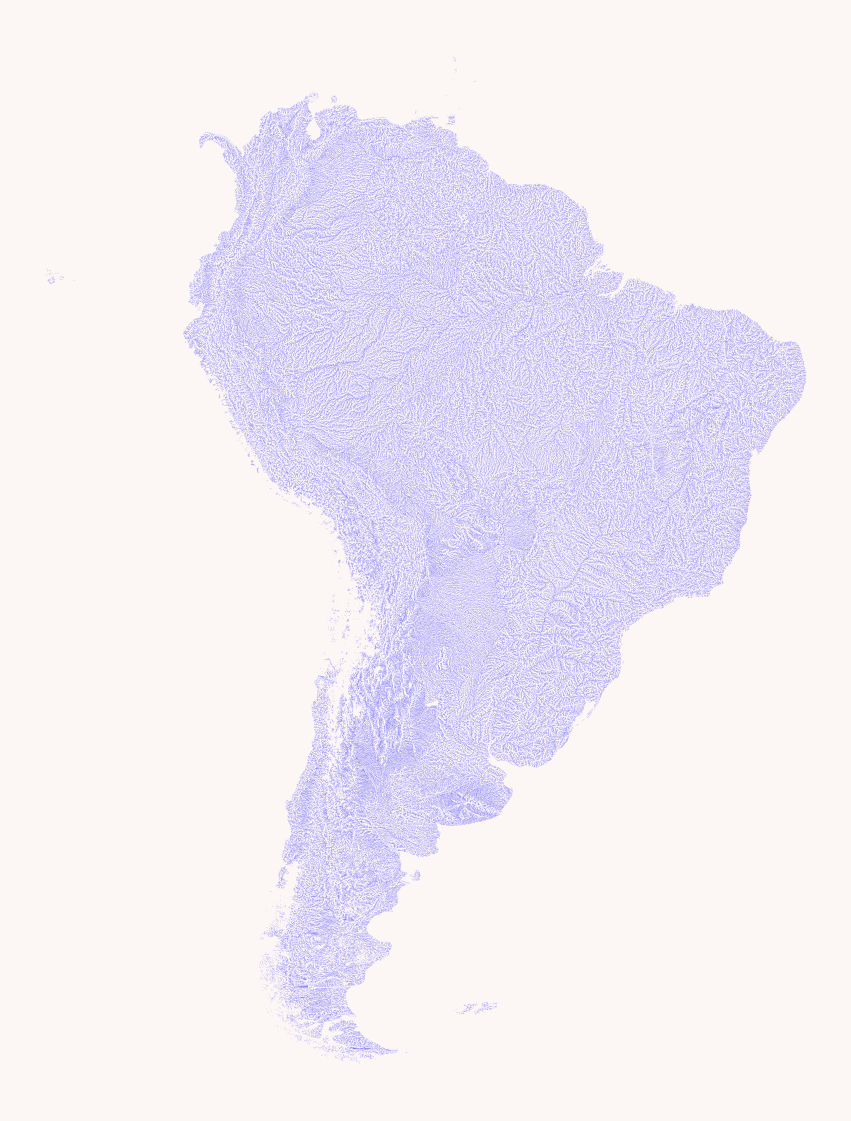

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 21)

samerica_rios.plot(ax=ax, color='blue', lw=0.1)
samerica_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)

ax.axis('off')

plt.show()

In [7]:
print(samerica_lakes)

         featurecla  scalerank  \
483            Lake          1   
486            Lake          3   
487            Lake          3   
505            Lake          4   
523            Lake          4   
563            Lake          5   
564            Lake          5   
606            Lake          6   
607            Lake          6   
648            Lake          7   
663            Lake          7   
664            Lake          7   
665            Lake          7   
673            Lake          8   
678            Lake          8   
681            Lake          8   
688            Lake          8   
692            Lake          8   
693            Lake          8   
694            Lake          8   
713            Lake          8   
739            Lake          9   
740            Lake          9   
741            Lake          9   
742            Lake          9   
743            Lake          9   
744            Lake          9   
745            Lake          9   
746           

Preparar las cuencas de ríos

In [14]:
basins = gpd.read_file("hybas_sa_lev03_v1c.shp")
print(basins)

      HYBAS_ID  NEXT_DOWN   NEXT_SINK    MAIN_BAS  DIST_SINK  DIST_MAIN  \
0   6030000010          0  6030000010  6030000010        0.0        0.0   
1   6030000740          0  6030000740  6030000740        0.0        0.0   
2   6030000750          0  6030000750  6030000750        0.0        0.0   
3   6030004470          0  6030004470  6030004470        0.0        0.0   
4   6030004480          0  6030004480  6030004480        0.0        0.0   
5   6030006540          0  6030006540  6030006540        0.0        0.0   
6   6030007000          0  6030007000  6030007000        0.0        0.0   
7   6030007010          0  6030007010  6030007010        0.0        0.0   
8   6030007950          0  6030007950  6030007950        0.0        0.0   
9   6030007960          0  6030007960  6030007960        0.0        0.0   
10  6030008320          0  6030008320  6030008320        0.0        0.0   
11  6030009760          0  6030009760  6030009760        0.0        0.0   
12  6030009770          0

In [16]:
import pandas as pd

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280',
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482']

colors_df = pd.DataFrame({'basin': basins.MAIN_BAS.unique().tolist(), 'colors': colours_i_like})

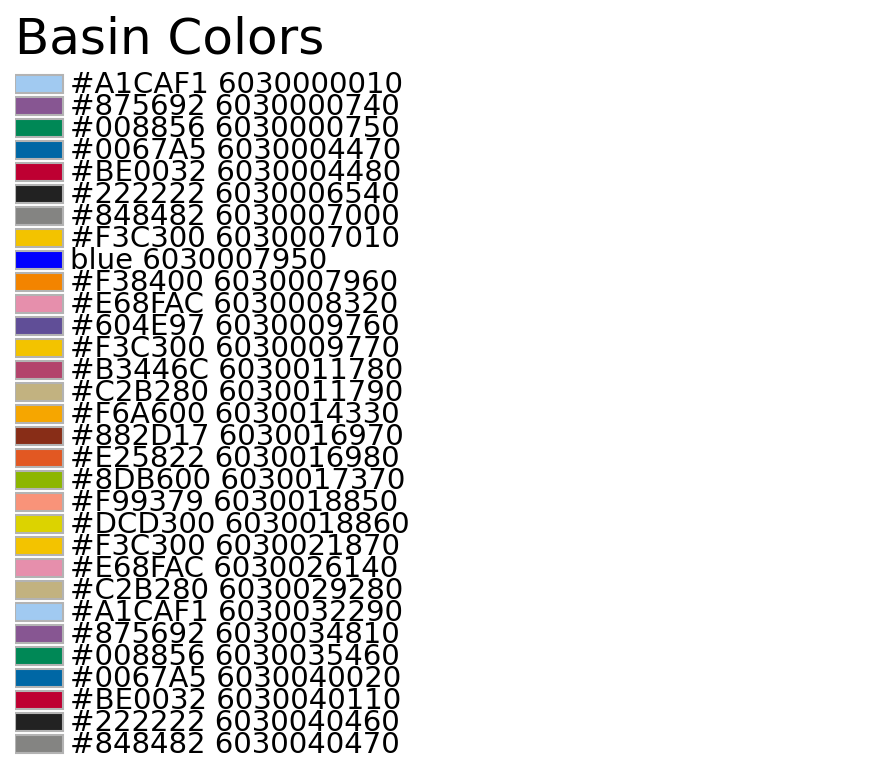

In [50]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 150

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAIN_BAS.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + str(basin)), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )
plt.show()

Combinar geodataframe basins con data frame colours. Representar los polígonos resultantes con diferentes colores

/home/yoviajo/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


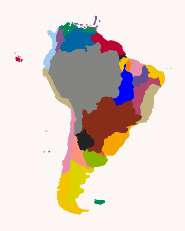

In [51]:
basins = pd.merge(basins, colors_df, left_on='MAIN_BAS', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAIN_BAS', edgecolor='face', color=basins['colors'])
ax.axis('off')
plt.show()

Hacer coincidir ríos y cuencas

Unión espacial para hacer coincidir los ríos con las cuencas. Se asigna así el nombre de cuenca y color a los ríos

In [22]:
rivers_basins = gpd.sjoin(samerica_rios, basins, op='intersects')

/home/yoviajo/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3191: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Ahora los ríos pueden representarse de acuerdo a la columna color

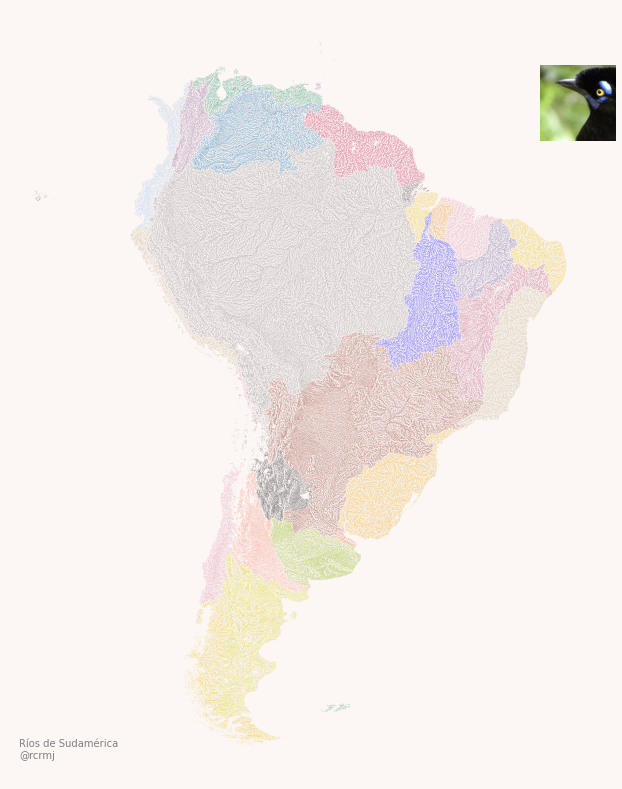

In [52]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10.5, 21)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=0.1)
samerica_lakes.plot(ax=ax, color='#FCF6F5FF')

logo = plt.imread('ave_recorte_256x256.JPG')
newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Ríos de Sudamérica \n@rcrmj",
              size=10,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.show()

Tomar en cuenta el tamaño del río

Tomar una columna (e.g., ancho o columna) y crear una nueva columna reescalada a un rango prefijado (0.005 - 0.6), más apto para la representación 

In [55]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.01, max_value: float = 1.2):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = 1.2 - 0.01
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = 0.005 + (valueScaled * rightSpan)
    return df


#rivers_basins = scale_lw(rivers_basins, 'DISCHARGE', min_value=0.005, max_value=0.6)
#rivers_basins = scale_lw(rivers_basins, 'WIDTH', min_value=0.005, max_value=0.6)
rivers_basins = scale_lw(rivers_basins, 'a_WIDTH', min_value=17.93, max_value=68.6)
rivers_basins = scale_lw(rivers_basins, 'a_DEPTH', min_value=0.55, max_value=1.57)

Representar los mapas de ríos tomando en cuenta el tamaño de río (ancho y profundidad)

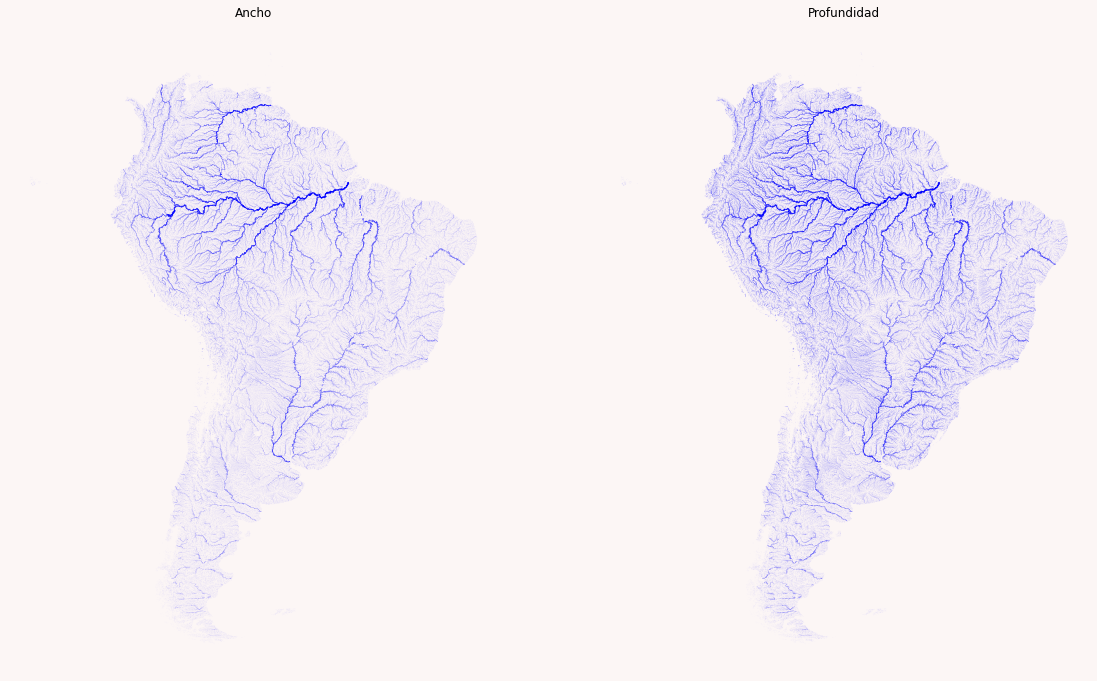

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')
#fig.set_size_inches(15, 7)
fig.set_size_inches(30, 14)

ax2 = plt.subplot(1,3,2)
rivers_basins.plot(ax=ax2, color='blue', lw=rivers_basins['LW_a_WIDTH'])
samerica_lakes.plot(ax=ax2, color='#FCF6F5FF')
ax2.set_title("Ancho", fontfamily='fantasy')
ax2.axis('off')

ax3 = plt.subplot(1,3,3)
rivers_basins.plot(ax=ax3, color='blue', lw=rivers_basins['LW_a_DEPTH'])
samerica_lakes.plot(ax=ax3, color='#FCF6F5FF')
ax3.set_title("Profundidad", fontfamily='fantasy')
ax3.axis('off')

plt.show()

Representar con ancho de línea ajustado por profundidad

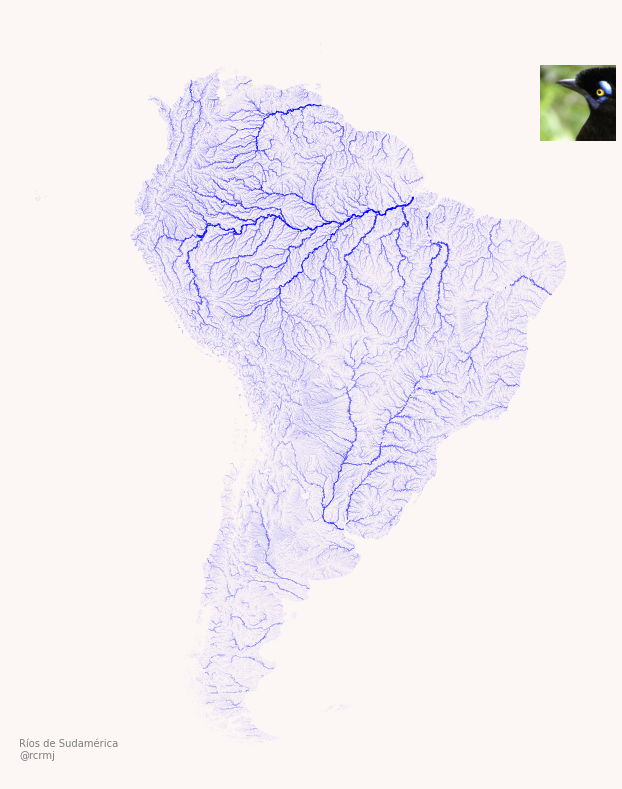

In [57]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10.5, 21)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_a_DEPTH'])
samerica_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Ríos de Sudamérica \n@rcrmj",
              size=10,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.show()

Ahora agregar color, según cuenca a la que pertenece un río, a la representación previa

In [58]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
#fig.set_size_inches(3.5, 7)
fig.set_size_inches(10.5, 21)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_a_DEPTH'])
samerica_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Ríos de Sudamérica \n@rcrmj",
              size=12,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.show()